# final version

In [1]:
import pandas as pd 
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pca import pca

## morphology data

In [2]:
morphology_df = pd.read_csv('condensed morphology data.csv')

## plate reader data

### formatting

put the data in the right format

In [3]:
plate_reader_df = pd.read_excel('Plate_reader_data_final.xlsx').rename({'Unnamed: 0':'defence system'}, axis =1)
# plate_reader_df
plate_reader_df = plate_reader_df.set_index('defence system')
plate_reader_df = plate_reader_df.transpose()
plate_reader_df = plate_reader_df.reset_index()
plate_reader_df.loc[:, 'index'] = list(plate_reader_df.loc[:, 'index'].str.extract('(.*)(?= dilution)').loc[:, 0])
plate_reader_df = plate_reader_df.set_index('index')
plate_reader_df = plate_reader_df.pivot_table(index = 'index', aggfunc='mean')

#reorder rows and columns 
defence_system_order = ['QatABCD',
 'RADAR',
 'Zorya Type I',
 'CBASS Type II',
 'TerY-P',
 'CBASS Type III',
 'AbiEii',
 'IetAS',
 'Septu',
 'Wadjet Type I',
 'Druantia Type III',
 'CBASS Type IIv',
 'Gao System 20',
 'AVAST Type V',
 'Gabija']
phage_order = [
    'Pa15',
 'Pa28',
'Pa36',
 'Pa29',
 'Pa22',
 'Pa6',
 'Pa18',
 'Pa25',
'Pa3',
 'Pa10',
 'Pa12',
 'Pa21',
 'Pa24',
 'Pa2',
 'Pa33',
 'Pa35']

plate_reader_df =  plate_reader_df.reindex(defence_system_order, axis = 1)
plate_reader_df = plate_reader_df.reindex(phage_order, axis = 0)

#plate_reader_df = plate_reader_df.rename(rename_dict, axis = 1)
#save it in this folder
plate_reader_df.to_csv('processed_plate_reader_data.csv')

In [4]:
print(len(defence_system_order))
print(len(phage_order))
print(str(15*16))

15
16
240


### PCA

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


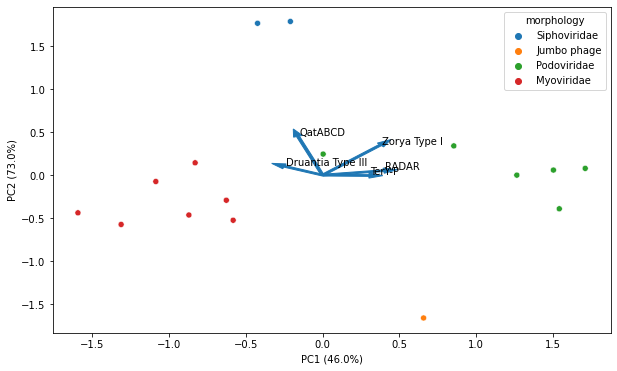

In [5]:
model = pca(n_components = 4, normalize=False)
result = model.fit_transform(plate_reader_df)
scatter_df = result['PC']
explained_var = result['explained_var']

sns.scatterplot(data = pd.merge(scatter_df.reset_index().rename({'index':'phage'}, axis =1), morphology_df), x = 'PC1', y = 'PC2', hue= 'morphology')
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(10, 7)


loadings_df = result['loadings'].drop(['PC3', 'PC4'])
transposed_loadings_df = loadings_df.transpose()
transposed_loadings_df.loc[:, 'size'] = (transposed_loadings_df.loc[:, 'PC1'])**2 + (transposed_loadings_df.loc[:, 'PC2'])**2
transposed_loadings_df.loc[:, 'sum'] = transposed_loadings_df.loc[:, 'PC1'] + transposed_loadings_df.loc[:, 'PC2']
transposed_loadings_df = transposed_loadings_df.sort_values('size', ascending=False).reset_index().rename({'index': 'defence system'}, axis= 1)
#arrows = ['RADAR', 'TerY-P']
arrows = ['RADAR', 'QatABCD','TerY-P', 'Druantia Type III', 'Zorya Type I']
# arrows = ['RADAR', 'CBASS Type III', 'Zorya type I', 'qatABCD', 'CBASS Type II', 'TerY-P', 'Gabija', 'Wadjet Type I', 'Druantia III']
# arrows = ['RADAR', 'CBASS Type III', 'Zorya type I', 'qatABCD', 'CBASS Type II', 'TerY-P', 'Gabija', 'Wadjet Type I', 'Druantia III', 'CBASS Other']
# arrows = ['CBASS Type III', 'CBASS Type II', 'CBASS Other']
# arrows = ['Septu', 'AbiEii']

for ii in range(len(arrows)): 
    defence_system = arrows[ii]
    row = pd.DataFrame(transposed_loadings_df.loc[transposed_loadings_df.loc[:, 'defence system'] == defence_system]).reset_index()
    dx = row.loc[0, 'PC1']
    dy = row.loc[0, 'PC2']
    ax.arrow(x = 0, y = 0, dx = dx, dy = dy, width = 0.02, color = 'tab:blue')
    plt.text(x = dx + 0.01, y = dy + 0.01,s =  defence_system)
# plt.arrow(x=0, y=0, dx=2, dy=5, width=.08) 
plt.xlabel('PC1 (' + str(np.round(explained_var[0],2)*100) + '%)')
plt.ylabel('PC2 (' + str(np.round(explained_var[1],2)*100) + '%)')
fig.set_size_inches(10, 6)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures' + '/' + 'plate reader pca with arrows.png', bbox_inches = 'tight')
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures' + '/' + 'plate reader pca with arrows.svg', bbox_inches = 'tight')
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'plate reader pca with arrows.png', bbox_inches = 'tight')

plt.show()

#### PCA without arrows, but with phage numbers

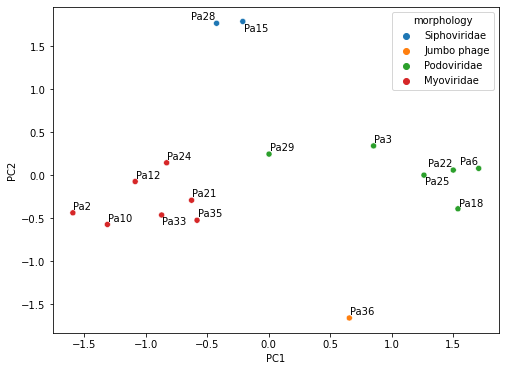

In [6]:
from adjustText import adjust_text
x = scatter_df.loc[:, 'PC1']
y = scatter_df.loc[:, 'PC2']
labels = scatter_df.reset_index().loc[:, 'index']
texts = [plt.text(x_pos, y_pos, f'{l}') for (x_pos, y_pos, l) in zip(x, y, labels)]
sns.scatterplot(data = pd.merge(scatter_df.reset_index().rename({'index':'phage'}, axis =1), morphology_df), x = 'PC1', y = 'PC2', hue= 'morphology')
adjust_text(texts)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + 
           '/' + 'plate reader PCA scatterplot.png')
plt.show()

### heatmap

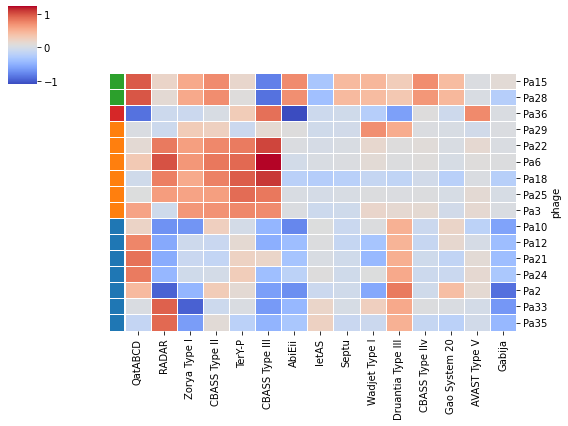

In [7]:
#be carefull tha tin this step, only the phages where we know the morphology of were kept for the dataframe
plate_reader_heatmap_df = pd.merge(plate_reader_df.reset_index().rename({'index': 'phage'}, axis = 1), morphology_df).drop(['morphology'], axis = 1)

#make the colors
morphology_array = pd.merge(plate_reader_heatmap_df, morphology_df).loc[:, 'morphology'].reset_index()
n_colors = len(morphology_array.loc[:, 'morphology'].value_counts())
keys = morphology_array.loc[:, 'morphology'].value_counts().keys()
values = list(sns.color_palette(n_colors=n_colors))
mapping_dictionary = dict(zip(keys, values))
mapping_dictionary[0] = (1,1,1)

#set the index to the phage again
plate_reader_heatmap_df = plate_reader_heatmap_df.set_index('phage')

#make the row colors
clustered_plate_reader_heatmap_df = plate_reader_heatmap_df

#clustered_plate_reader_heatmap_df.reindex(col_index,)
color_array = list(pd.merge(clustered_plate_reader_heatmap_df.reset_index(), morphology_df).loc[:, 'morphology'].map(mapping_dictionary).reset_index().loc[:, 'morphology'])

#make the clustermap
sns.clustermap(data = clustered_plate_reader_heatmap_df, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'plate_reader_heatmap.png', dpi = 1000)

plt.show()

#plate_reader_df.reset_index().rename({'index': 'phage'},axis = 1)

#### heatmap for pro-qatABCD gene

In [ ]:
lustered_plate_reader_heatmap_df.loc[:, defence_system]

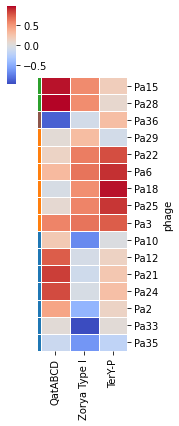

In [31]:
sns.clustermap(data = clustered_plate_reader_heatmap_df.loc[:, defence_systems_list], row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(2.5,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'plate_reader_heatmap_pro_qatABCD.png', dpi = 1000)

#### heatmap with median normalization

C:\Users\Halewijn\AppData\Local\Temp/ipykernel_19336/1083977518.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = median_filtered_df.median()


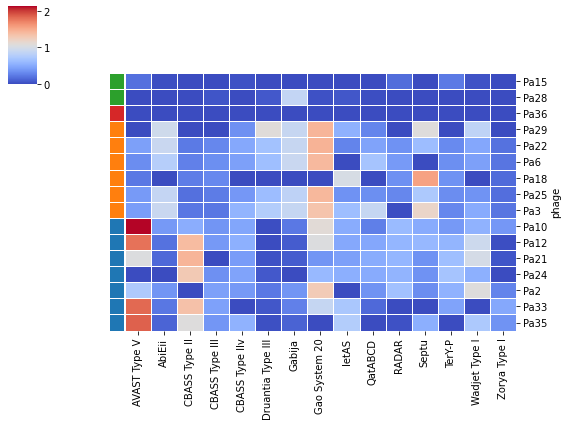

In [8]:
#make a phage correspond to a certain morphology
plate_reader_heatmap_morphology = pd.merge(plate_reader_heatmap_df.reset_index(), morphology_df).set_index('phage')
phage_morphology_df = pd.merge(plate_reader_heatmap_df.reset_index(), morphology_df)[['phage', 'morphology']]
unique_morphologies = phage_morphology_df.loc[:, 'morphology'].unique()
#now filter on each morphology
normalized_heatmap_array = []
for morphology in unique_morphologies:
    median_filtered_df = plate_reader_heatmap_morphology[plate_reader_heatmap_morphology.loc[:, 'morphology'] == morphology]
    median = median_filtered_df.median()
    final_median_filtered_df = median_filtered_df/median
    minimum = final_median_filtered_df.min()
    final_median_filtered_df = final_median_filtered_df.subtract(minimum, axis = 1) + 1
    normalized_heatmap_array = normalized_heatmap_array + [final_median_filtered_df]
normalized_heatmap_df = pd.concat(normalized_heatmap_array).drop('morphology', axis =1).astype('float')
normalized_heatmap_df = np.log10(normalized_heatmap_df)
sns.clustermap(data = normalized_heatmap_df, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'plate_reader_heatmap_normalization.png', dpi = 1000)



#### heatmap with minmax scaler

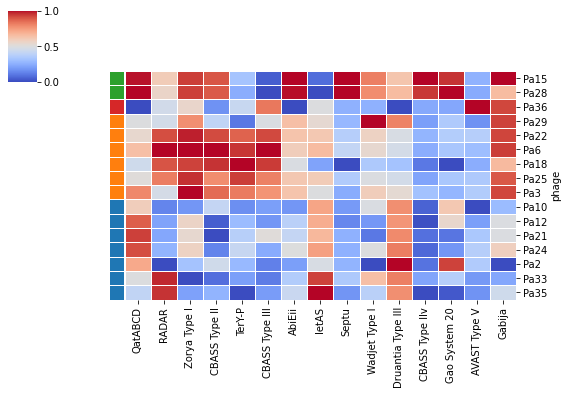

In [9]:
minmax_clustered_plate_reader_heatmap_df =  clustered_plate_reader_heatmap_df.sub(clustered_plate_reader_heatmap_df.min())/(clustered_plate_reader_heatmap_df.max() - clustered_plate_reader_heatmap_df.min())
sns.clustermap(data = minmax_clustered_plate_reader_heatmap_df, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,5.5), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'plate_reader_heatmap_minmax_normalization.png', dpi = 1000)


## EOP data

### formatting

In [10]:
EOP_df = pd.read_excel('EOPs_final_data.xlsx').rename({'Unnamed: 0': 'phage'}, axis = 1)
EOP_df = EOP_df.dropna()

# #get the column names
original_columns = EOP_df.columns
column_dataframe = pd.DataFrame(original_columns).rename({0: 'column name'}, axis = 1)
filt = (column_dataframe.loc[:, 'column name'].str.contains('Unnamed') == False)
compressed_columns = list(column_dataframe[filt].loc[:, 'column name'].drop(0))
repeated_compressed_columns = np.repeat(compressed_columns,3)
final_columns = ['phage'] + list(repeated_compressed_columns)
EOP_df = EOP_df.set_axis(final_columns, axis = 1)

# #average
EOP_df = EOP_df.set_index('phage')
EOP_df = EOP_df.transpose().reset_index().rename({'index': 'defence system'}, axis = 1).set_index('defence system').pivot_table(index= 'defence system', aggfunc = 'mean').transpose()
EOP_df = EOP_df.set_index(['Pa']*EOP_df.shape[0] +  EOP_df.reset_index().loc[:, 'phage'].astype('int').astype('str'))

#cluster 
EOP_df =  EOP_df.reindex(defence_system_order, axis = 1)
EOP_df = EOP_df.reindex(phage_order, axis = 0)

EOP_df.to_csv('processed_EOP_data.csv')

### PCA

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


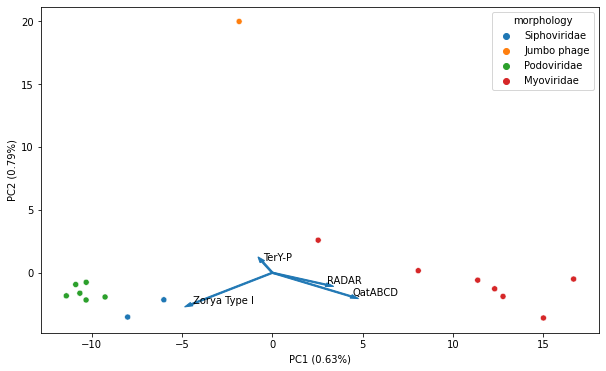

In [11]:
from pca import pca
model = pca(n_components = 4, normalize=False)
result = model.fit_transform(EOP_df)
scatter_df = result['PC']
explained_var = result['explained_var']

sns.scatterplot(data = pd.merge(scatter_df.reset_index().rename({'index':'phage'}, axis =1), morphology_df), x = 'PC1', y = 'PC2', hue= 'morphology')
fig = plt.gcf()
ax = plt.gca()

loadings_df = result['loadings'].drop(['PC3', 'PC4'])
transposed_loadings_df = loadings_df.transpose()
transposed_loadings_df.loc[:, 'size'] = (transposed_loadings_df.loc[:, 'PC1'])**2 + (transposed_loadings_df.loc[:, 'PC2'])**2
transposed_loadings_df.loc[:, 'sum'] = transposed_loadings_df.loc[:, 'PC1'] + transposed_loadings_df.loc[:, 'PC2']
transposed_loadings_df = transposed_loadings_df.sort_values('size', ascending=False).reset_index().rename({'index': 'defence system'}, axis= 1)
arrows = ['RADAR', 'TerY-P', 'QatABCD', 'Zorya Type I']
# arrows = ['RADAR', 'CBASS Type III', 'Zorya type I', 'qatABCD', 'CBASS Type II', 'TerY-P', 'Gabija', 'Wadjet Type I', 'Druantia III']
# # arrows = ['RADAR', 'CBASS Type III', 'Zorya type I', 'qatABCD', 'CBASS Type II', 'TerY-P', 'Gabija', 'Wadjet Type I', 'Druantia III', 'CBASS Other']
# arrows = ['CBASS type III', 'CBASS type II', 'CBASS type III']
# arrows = ['AbiEii', 'Septu']
factor = 7
for ii in range(len(arrows)): 
    defence_system = arrows[ii]
    row = pd.DataFrame(transposed_loadings_df.loc[transposed_loadings_df.loc[:, 'defence system'] == defence_system]).reset_index()
    dx = row.loc[0, 'PC1']
    dy = row.loc[0, 'PC2']
    ax.arrow(x = 0, y = 0, dx = factor*dx, dy = factor*dy, width = 0.1, color = 'tab:blue')
    plt.text(x = factor*dx + 0.01*factor, y = factor*dy + 0.01*factor,s =  defence_system)
# plt.arrow(x=0, y=0, dx=2, dy=5, width=.08) 
plt.xlabel('PC1 (' + str(np.round(explained_var[0],2)) + '%)')
plt.ylabel('PC2 (' + str(np.round(explained_var[1],2)) + '%)')
fig.set_size_inches(10, 6)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + 
           '/' + 'EOP pca with arrows.png')

plt.show()

#### PCA without arrows, but with phage numbers

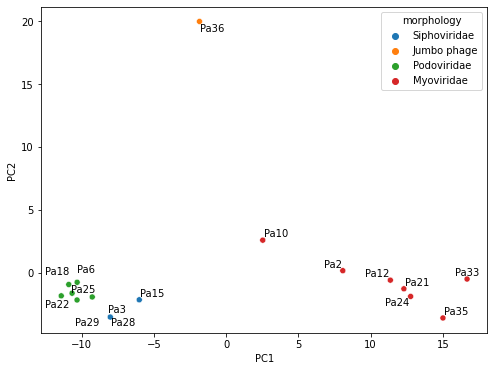

In [12]:
from adjustText import adjust_text
x = scatter_df.loc[:, 'PC1']
y = scatter_df.loc[:, 'PC2']
labels = scatter_df.reset_index().loc[:, 'index']
texts = [plt.text(x_pos, y_pos, f'{l}') for (x_pos, y_pos, l) in zip(x, y, labels)]
sns.scatterplot(data = pd.merge(scatter_df.reset_index().rename({'index':'phage'}, axis =1), morphology_df), x = 'PC1', y = 'PC2', hue= 'morphology')
adjust_text(texts)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + 
           '/' + 'EOP PCA scatterplot.png')
plt.show()

### heatmap

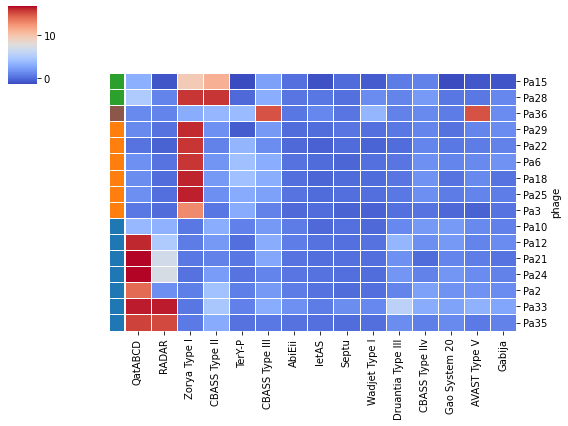

In [13]:
#be carefull tha tin this step, only the phages where we know the morphology of were kept for the dataframe
EOP_heatmap_df = pd.merge(EOP_df.reset_index(), morphology_df).drop('morphology', axis = 1)

#make the colors
morphology_array = pd.merge(EOP_heatmap_df, morphology_df).loc[:, 'morphology'].reset_index()
n_colors = len(morphology_array.loc[:, 'morphology'].value_counts())
keys = morphology_array.loc[:, 'morphology'].value_counts().keys()
values = list(sns.color_palette(n_colors=n_colors))
mapping_dictionary = dict(zip(keys, values))
mapping_dictionary['Jumbo phage'] = sns.color_palette(n_colors = 6)[5]

#set the index to the phage again
EOP_heatmap_df = EOP_heatmap_df.set_index('phage')

#make the row colors
clustered_EOP_heatmap_df = EOP_heatmap_df

#clustered_EOP_heatmap_df.reindex(col_index,)
color_array = list(pd.merge(clustered_EOP_heatmap_df.reset_index(), morphology_df).loc[:, 'morphology'].map(mapping_dictionary).reset_index().loc[:, 'morphology'])

#make the clustermap
clustermap= sns.clustermap(data = clustered_EOP_heatmap_df.fillna(0), row_cluster=False, col_cluster=False, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels = True, row_colors=color_array)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'EOP_heatmap.png' )
plt.show()


#### heatmap with median normalization

C:\Users\Halewijn\AppData\Local\Temp/ipykernel_19336/3949566354.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = median_filtered_df.median()


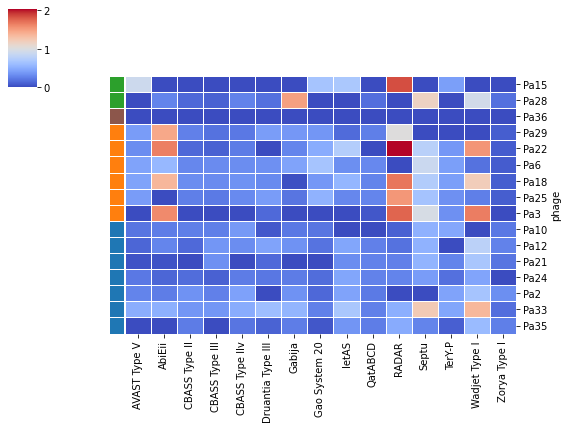

In [14]:
#make a phage correspond to a certain morphology
EOP_heatmap_morphology = pd.merge(EOP_heatmap_df.reset_index(), morphology_df).set_index('phage')
phage_morphology_df = pd.merge(EOP_heatmap_df.reset_index(), morphology_df)[['phage', 'morphology']]
unique_morphologies = phage_morphology_df.loc[:, 'morphology'].unique()
#now filter on each morphology
normalized_heatmap_array = []
for morphology in unique_morphologies:
    median_filtered_df = EOP_heatmap_morphology[EOP_heatmap_morphology.loc[:, 'morphology'] == morphology]
    median = median_filtered_df.median()
    final_median_filtered_df = median_filtered_df/median
    minimum = final_median_filtered_df.min()
    final_median_filtered_df = final_median_filtered_df.subtract(minimum, axis = 1) + 1
    normalized_heatmap_array = normalized_heatmap_array + [final_median_filtered_df]
normalized_heatmap_df = pd.concat(normalized_heatmap_array).drop('morphology', axis =1).astype('float')
normalized_heatmap_df = np.log10(normalized_heatmap_df)
pd.merge(normalized_heatmap_df.reset_index(), morphology_df).loc[:, 'morphology'].map(mapping_dictionary)
sns.clustermap(data = normalized_heatmap_df, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'EOP_heatmap_normalization.png', dpi = 1000)


#### heatmap with minmax normalization

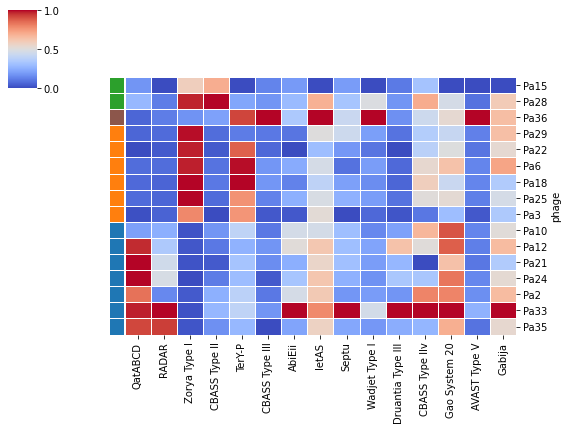

In [15]:
minmax_clustered_EOP_heatmap_df =  clustered_EOP_heatmap_df.sub(clustered_EOP_heatmap_df.min())/(clustered_EOP_heatmap_df.max() - clustered_EOP_heatmap_df.min())
sns.clustermap(data = minmax_clustered_EOP_heatmap_df, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'EOP_heatmap_minmax_normalization.png', dpi = 1000)


## Analysis on EOP and plate reader data

In [16]:
def correlation_coefficient(T1, T2):
    T1 = np.array(T1.fillna(0))
    T2 = np.array(T2.fillna(0))
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    else:
        result = numerator / denominator
        return result

In [17]:
morphology = 'Podoviridae'
a = pd.merge(clustered_EOP_heatmap_df.reset_index(), morphology_df)
a = a[a.loc[:, 'morphology'] == morphology].drop('morphology', axis = 1).set_index('phage')
b = pd.merge(clustered_plate_reader_heatmap_df.reset_index(), morphology_df)
b = b[b.loc[:, 'morphology'] == morphology].drop('morphology', axis = 1).set_index('phage')
correlation_coefficient(a,b)


0.3631535115534373

In [18]:
morphology = 'Podoviridae'
a = pd.merge(minmax_clustered_EOP_heatmap_df.reset_index(), morphology_df)
a = a[a.loc[:, 'morphology'] == morphology].drop('morphology', axis = 1).set_index('phage')
b = pd.merge(minmax_clustered_plate_reader_heatmap_df.reset_index(), morphology_df)
b = b[b.loc[:, 'morphology'] == morphology].drop('morphology', axis = 1).set_index('phage')
correlation_coefficient(a,b)

0.2757895856718104

In [19]:
correlation_coefficient(clustered_EOP_heatmap_df, clustered_plate_reader_heatmap_df)

0.3525083182043568

In [20]:
correlation_coefficient(minmax_clustered_EOP_heatmap_df, minmax_clustered_plate_reader_heatmap_df)


0.24142712510073763

## plaque size

### raw plaque size data 

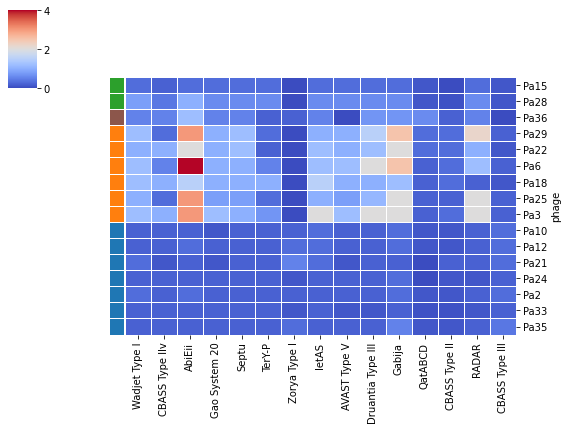

In [21]:
plaque_df = pd.read_excel('plaque_size_final.xlsx', header = 1, na_values='-')
plaque_df = plaque_df.rename({'Unnamed: 0': 'phage'}, axis = 1)
plaque_df = plaque_df.set_index('phage')
plaque_df.reindex(defence_system_order, axis = 1)
plaque_df = plaque_df.reindex(phage_order)

#drop the empty plasmid
raw_plaque_df = plaque_df.drop('Empty Plasmid', axis =1)
sns.clustermap(data = raw_plaque_df, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.show()

### fold change compared to empty plasmid

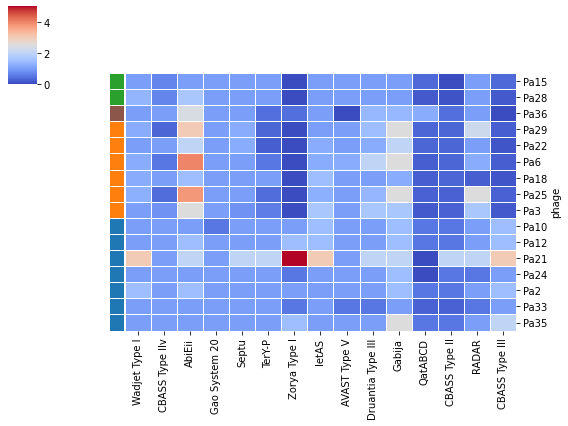

In [22]:
fold_change_plaque_df =  plaque_df.divide(plaque_df.loc[:, 'Empty Plasmid'], axis = 0)
fold_change_plaque_df = fold_change_plaque_df.drop('Empty Plasmid', axis = 1)

sns.clustermap(data = fold_change_plaque_df, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True)
plt.show()

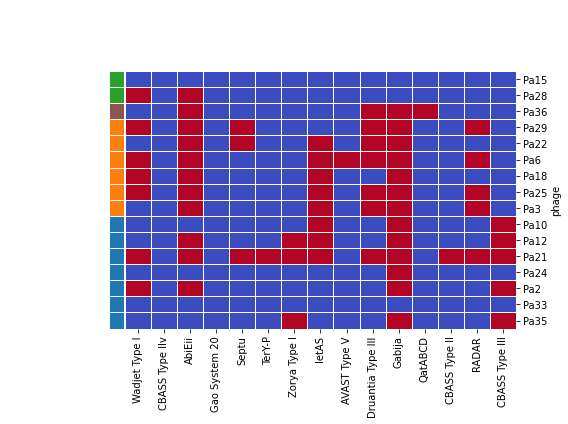

In [23]:

sns.clustermap(data = fold_change_plaque_df>1, row_cluster=False, col_cluster=False, row_colors=color_array, figsize=(8,6), cmap = 'coolwarm', linewidth = 0.5, yticklabels =True, cbar_pos=None)
#sns.heatmap(data = fold_change_plaque_df > 1, cmap = 'coolwarm')
plt.savefig(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\figures\final_figures' + '/' + 'plaque size binary heatmap.png', bbox_inches = 'tight')
plt.show()